Importing libraries

In [1]:
import os
import string
import random
from collections import Counter
from docx import Document
import matplotlib.pyplot as plt

Text pre-processing and dataset creation

In [2]:
def preprocess_text(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if not any(char.isdigit() for char in word)]
    return ' '.join(filtered_words)

def create_dataset_from_docs(directory):
    dataset = []
    for filename in os.listdir(directory):
        if filename.endswith(".docx"):
            filepath = os.path.join(directory, filename)
            doc = Document(filepath)
            text = ""
            for paragraph in doc.paragraphs:
                text += paragraph.text
            dataset.append(text)
    return dataset

Distribution of the number of words used in the text

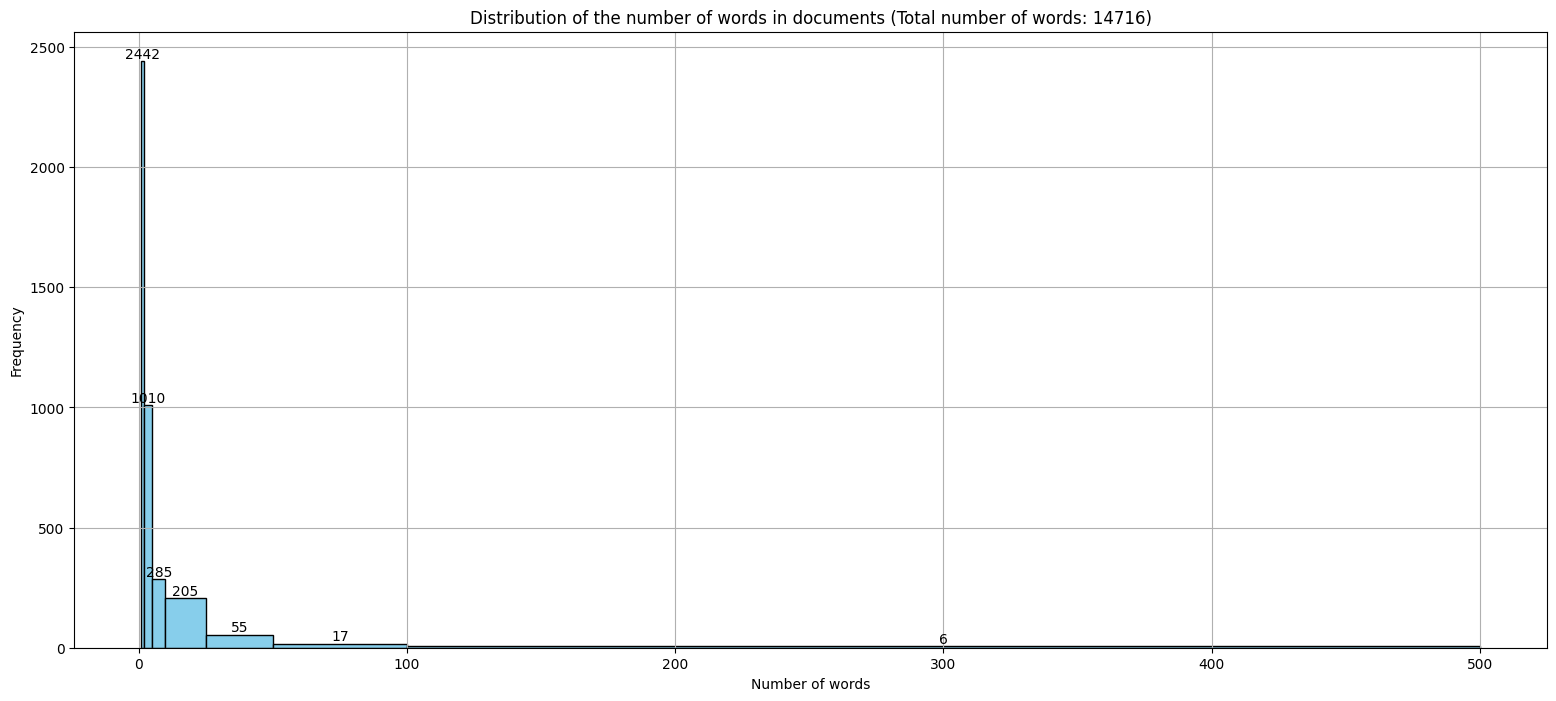

In [3]:
def word_distribution(dataset):
    concatenated_text = ' '.join(dataset)
    preprocessed_text = preprocess_text(concatenated_text)
    words = preprocessed_text.split()
    word_counts = Counter(words)
    return word_counts

directory_path = "../texts"
dataset = create_dataset_from_docs(directory_path)
distribution = word_distribution(dataset)
total_words = sum(distribution.values())
word_counts = list(distribution.values())

custom_bins = [ 1, 2, 5, 10, 25, 50, 100, 500]

plt.figure(figsize=(19, 8))
plt.hist(word_counts, bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title(f'Distribution of the number of words in documents (Total number of words: {total_words})')
plt.grid(True)

for i in range(len(custom_bins)-1):
    bin_count = len([count for count in word_counts if custom_bins[i] <= count < custom_bins[i+1]])
    if bin_count > 0:
        plt.text((custom_bins[i] + custom_bins[i+1]) / 2, bin_count, str(bin_count), ha='center', va='bottom')

plt.show()

A graph of the number of words in each file

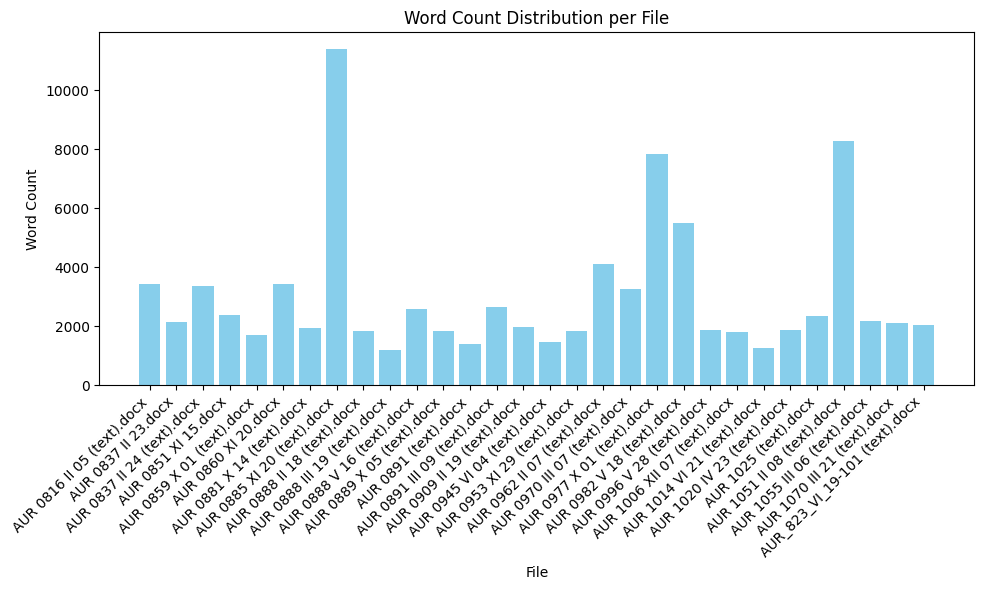

In [4]:
def create_dataset_from_docs(directory):
    dataset = {}
    for filename in os.listdir(directory):
        if filename.endswith(".docx"):
            filepath = os.path.join(directory, filename)
            doc = Document(filepath)
            text = ""
            for paragraph in doc.paragraphs:
                text += paragraph.text
            dataset[filename] = text
    return dataset

directory_path = "../texts"
dataset = create_dataset_from_docs(directory_path)

file_word_counts = {}
for filename, text in dataset.items():
    distribution = word_distribution(text)
    total_words = sum(distribution.values())
    file_word_counts[filename] = total_words


plt.figure(figsize=(10, 6))
plt.bar(file_word_counts.keys(), file_word_counts.values(), color='skyblue')
plt.xlabel('File')
plt.ylabel('Word Count')
plt.title('Word Count Distribution per File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Boxplot of the number of words in each file

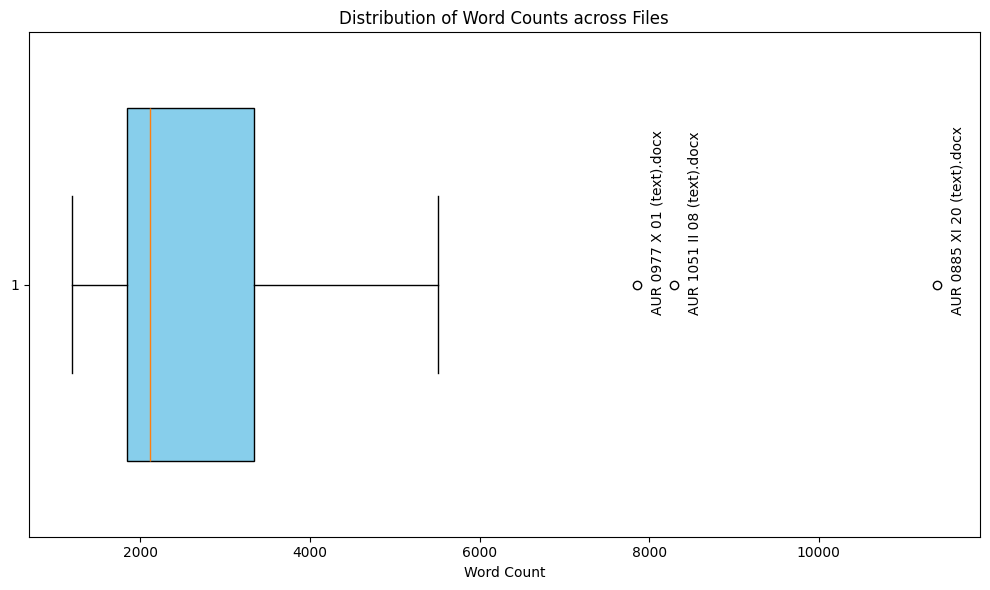

In [5]:
file_names = list(file_word_counts.keys())
word_counts = list(file_word_counts.values())

plt.figure(figsize=(10, 6))
bplot = plt.boxplot(word_counts, vert=False, patch_artist=True, widths=0.7, boxprops=dict(facecolor='skyblue'))

outliers = bplot['fliers'][0].get_xdata()

for i, outlier in enumerate(outliers):
    idx = word_counts.index(outlier)
    filename = file_names[idx]
    
    plt.annotate(filename, (outlier, 1), textcoords="offset points", xytext=(10,-20), ha='left', rotation=90)

plt.xlabel('Word Count')
plt.title('Distribution of Word Counts across Files')
plt.tight_layout()
plt.show()


The number of words used 1-2 times in each file

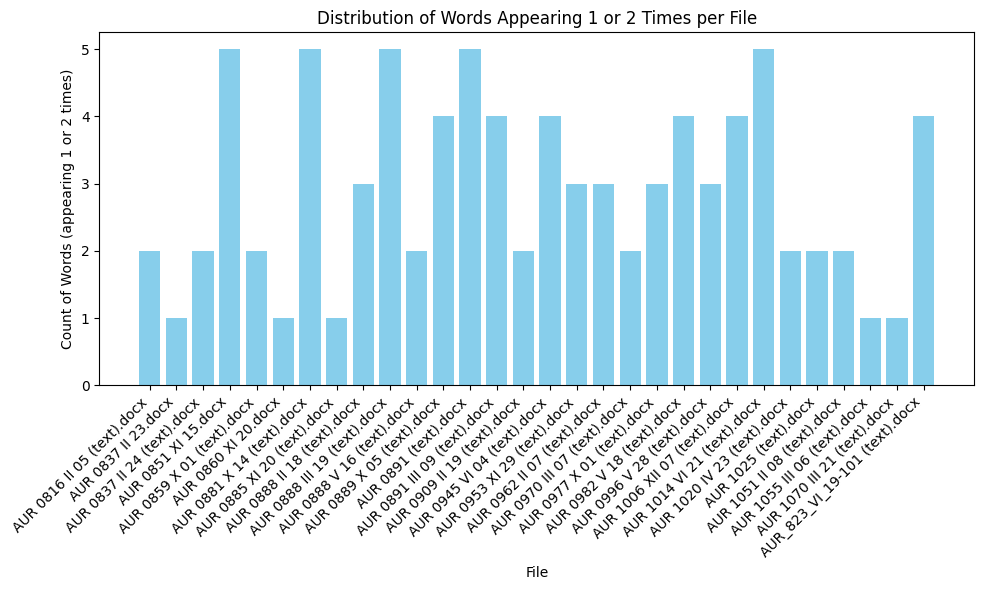

In [6]:
file_specific_word_counts = {}
for filename, text in dataset.items():
    distribution = word_distribution(text)
    specific_word_count = sum(1 for word, count in distribution.items() if count == 1 or count == 2)
    file_specific_word_counts[filename] = specific_word_count

plt.figure(figsize=(10, 6))
plt.bar(file_specific_word_counts.keys(), file_specific_word_counts.values(), color='skyblue')
plt.xlabel('File')
plt.ylabel('Count of Words (appearing 1 or 2 times)')
plt.title('Distribution of Words Appearing 1 or 2 Times per File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Boxplot of the number of words used 1-2 times in each file

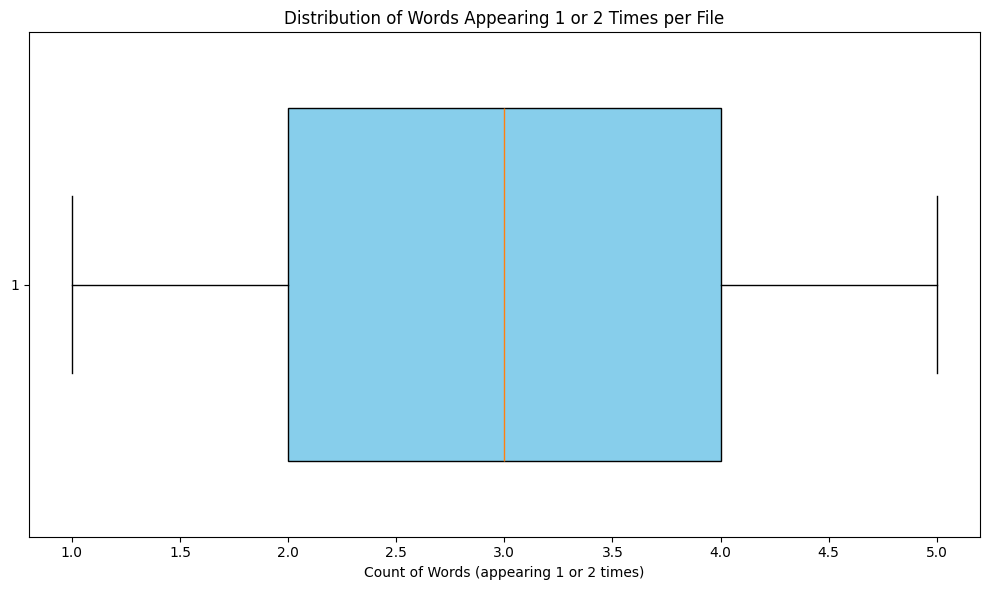

In [7]:
file_names = list(file_specific_word_counts.keys())
specific_word_counts = list(file_specific_word_counts.values())

plt.figure(figsize=(10, 6))
bplot = plt.boxplot(specific_word_counts, vert=False, patch_artist=True, widths=0.7, boxprops=dict(facecolor='skyblue'))

outliers = bplot['fliers'][0].get_xdata()

for i, outlier in enumerate(outliers):
    idx = specific_word_counts.index(outlier)
    filename = file_names[idx]
    plt.annotate(filename, (outlier, 1), textcoords="offset points", xytext=(10,-20), ha='left', rotation=90)

plt.xlabel('Count of Words (appearing 1 or 2 times)')
plt.title('Distribution of Words Appearing 1 or 2 Times per File')
plt.tight_layout()
plt.show()


The ratio of the number of words used 1-2 times to the total number of words for each file

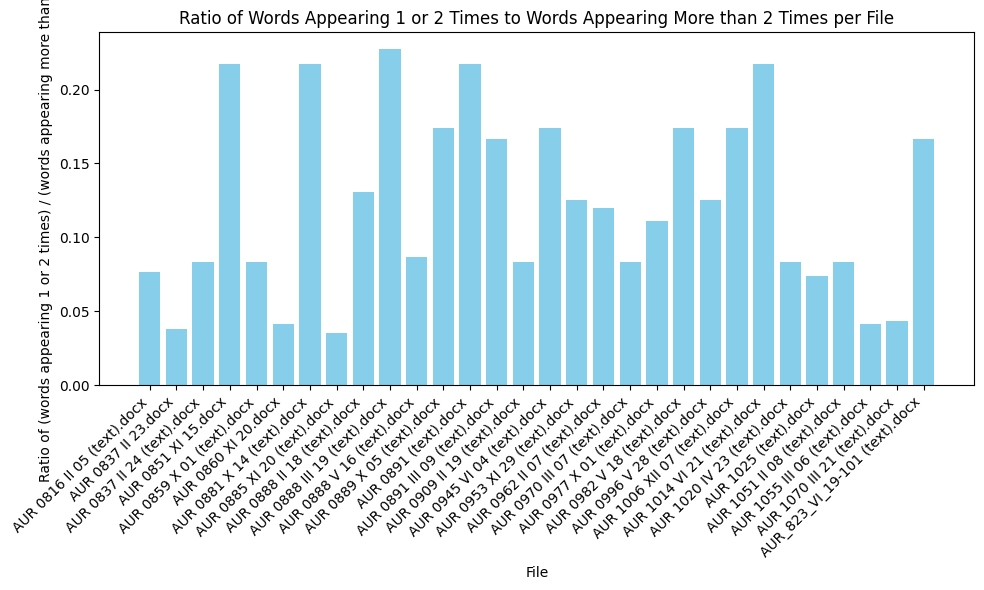

In [8]:
file_ratios = {}
for filename, text in dataset.items():
    distribution = word_distribution(text)
    count_1_or_2 = sum(1 for word, count in distribution.items() if count == 1 or count == 2)
    count_more_than_2 = sum(1 for word, count in distribution.items() if count > 2)
    if count_more_than_2 == 0:
        ratio = float('inf')
    else:
        ratio = count_1_or_2 / count_more_than_2
    file_ratios[filename] = ratio

plt.figure(figsize=(10, 6))
plt.bar(file_ratios.keys(), file_ratios.values(), color='skyblue')
plt.xlabel('File')
plt.ylabel('Ratio of (words appearing 1 or 2 times) / (words appearing more than 2 times)')
plt.title('Ratio of Words Appearing 1 or 2 Times to Words Appearing More than 2 Times per File')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Boxplot of he ratio of the number of words used 1-2 times to the total number of words for each file

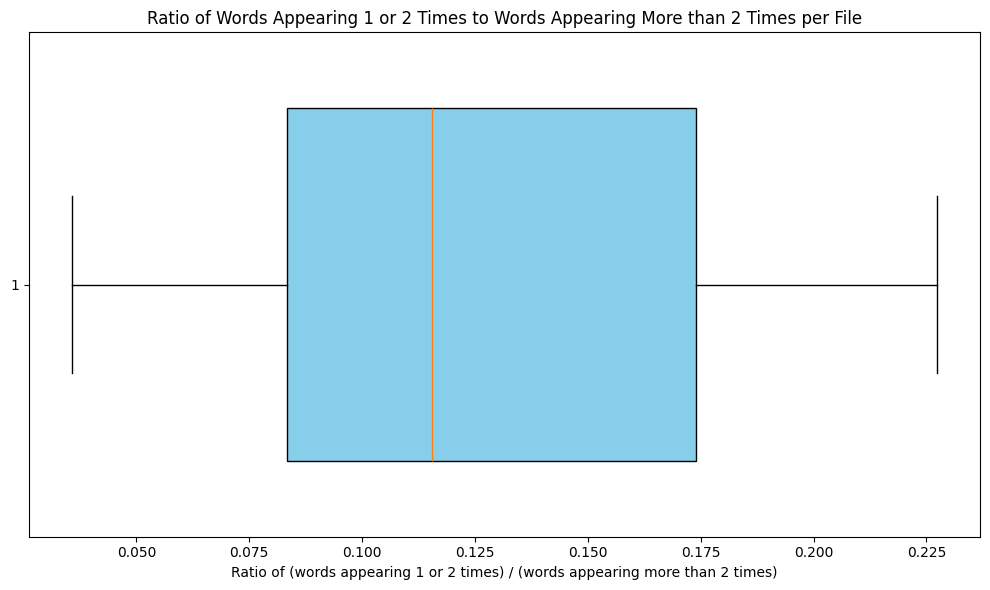

In [9]:
file_names = list(file_ratios.keys())
ratios = list(file_ratios.values())

plt.figure(figsize=(10, 6))
bplot = plt.boxplot(ratios, vert=False, patch_artist=True, widths=0.7, boxprops=dict(facecolor='skyblue'))

outliers = bplot['fliers'][0].get_xdata()

for i, outlier in enumerate(outliers):
    idx = ratios.index(outlier)
    filename = file_names[idx]
    plt.annotate(filename, (outlier, 1), textcoords="offset points", xytext=(10,-20), ha='left', rotation=90)

plt.xlabel('Ratio of (words appearing 1 or 2 times) / (words appearing more than 2 times)')
plt.title('Ratio of Words Appearing 1 or 2 Times to Words Appearing More than 2 Times per File')
plt.tight_layout()
plt.show()

Distribution of the number of words used for each file

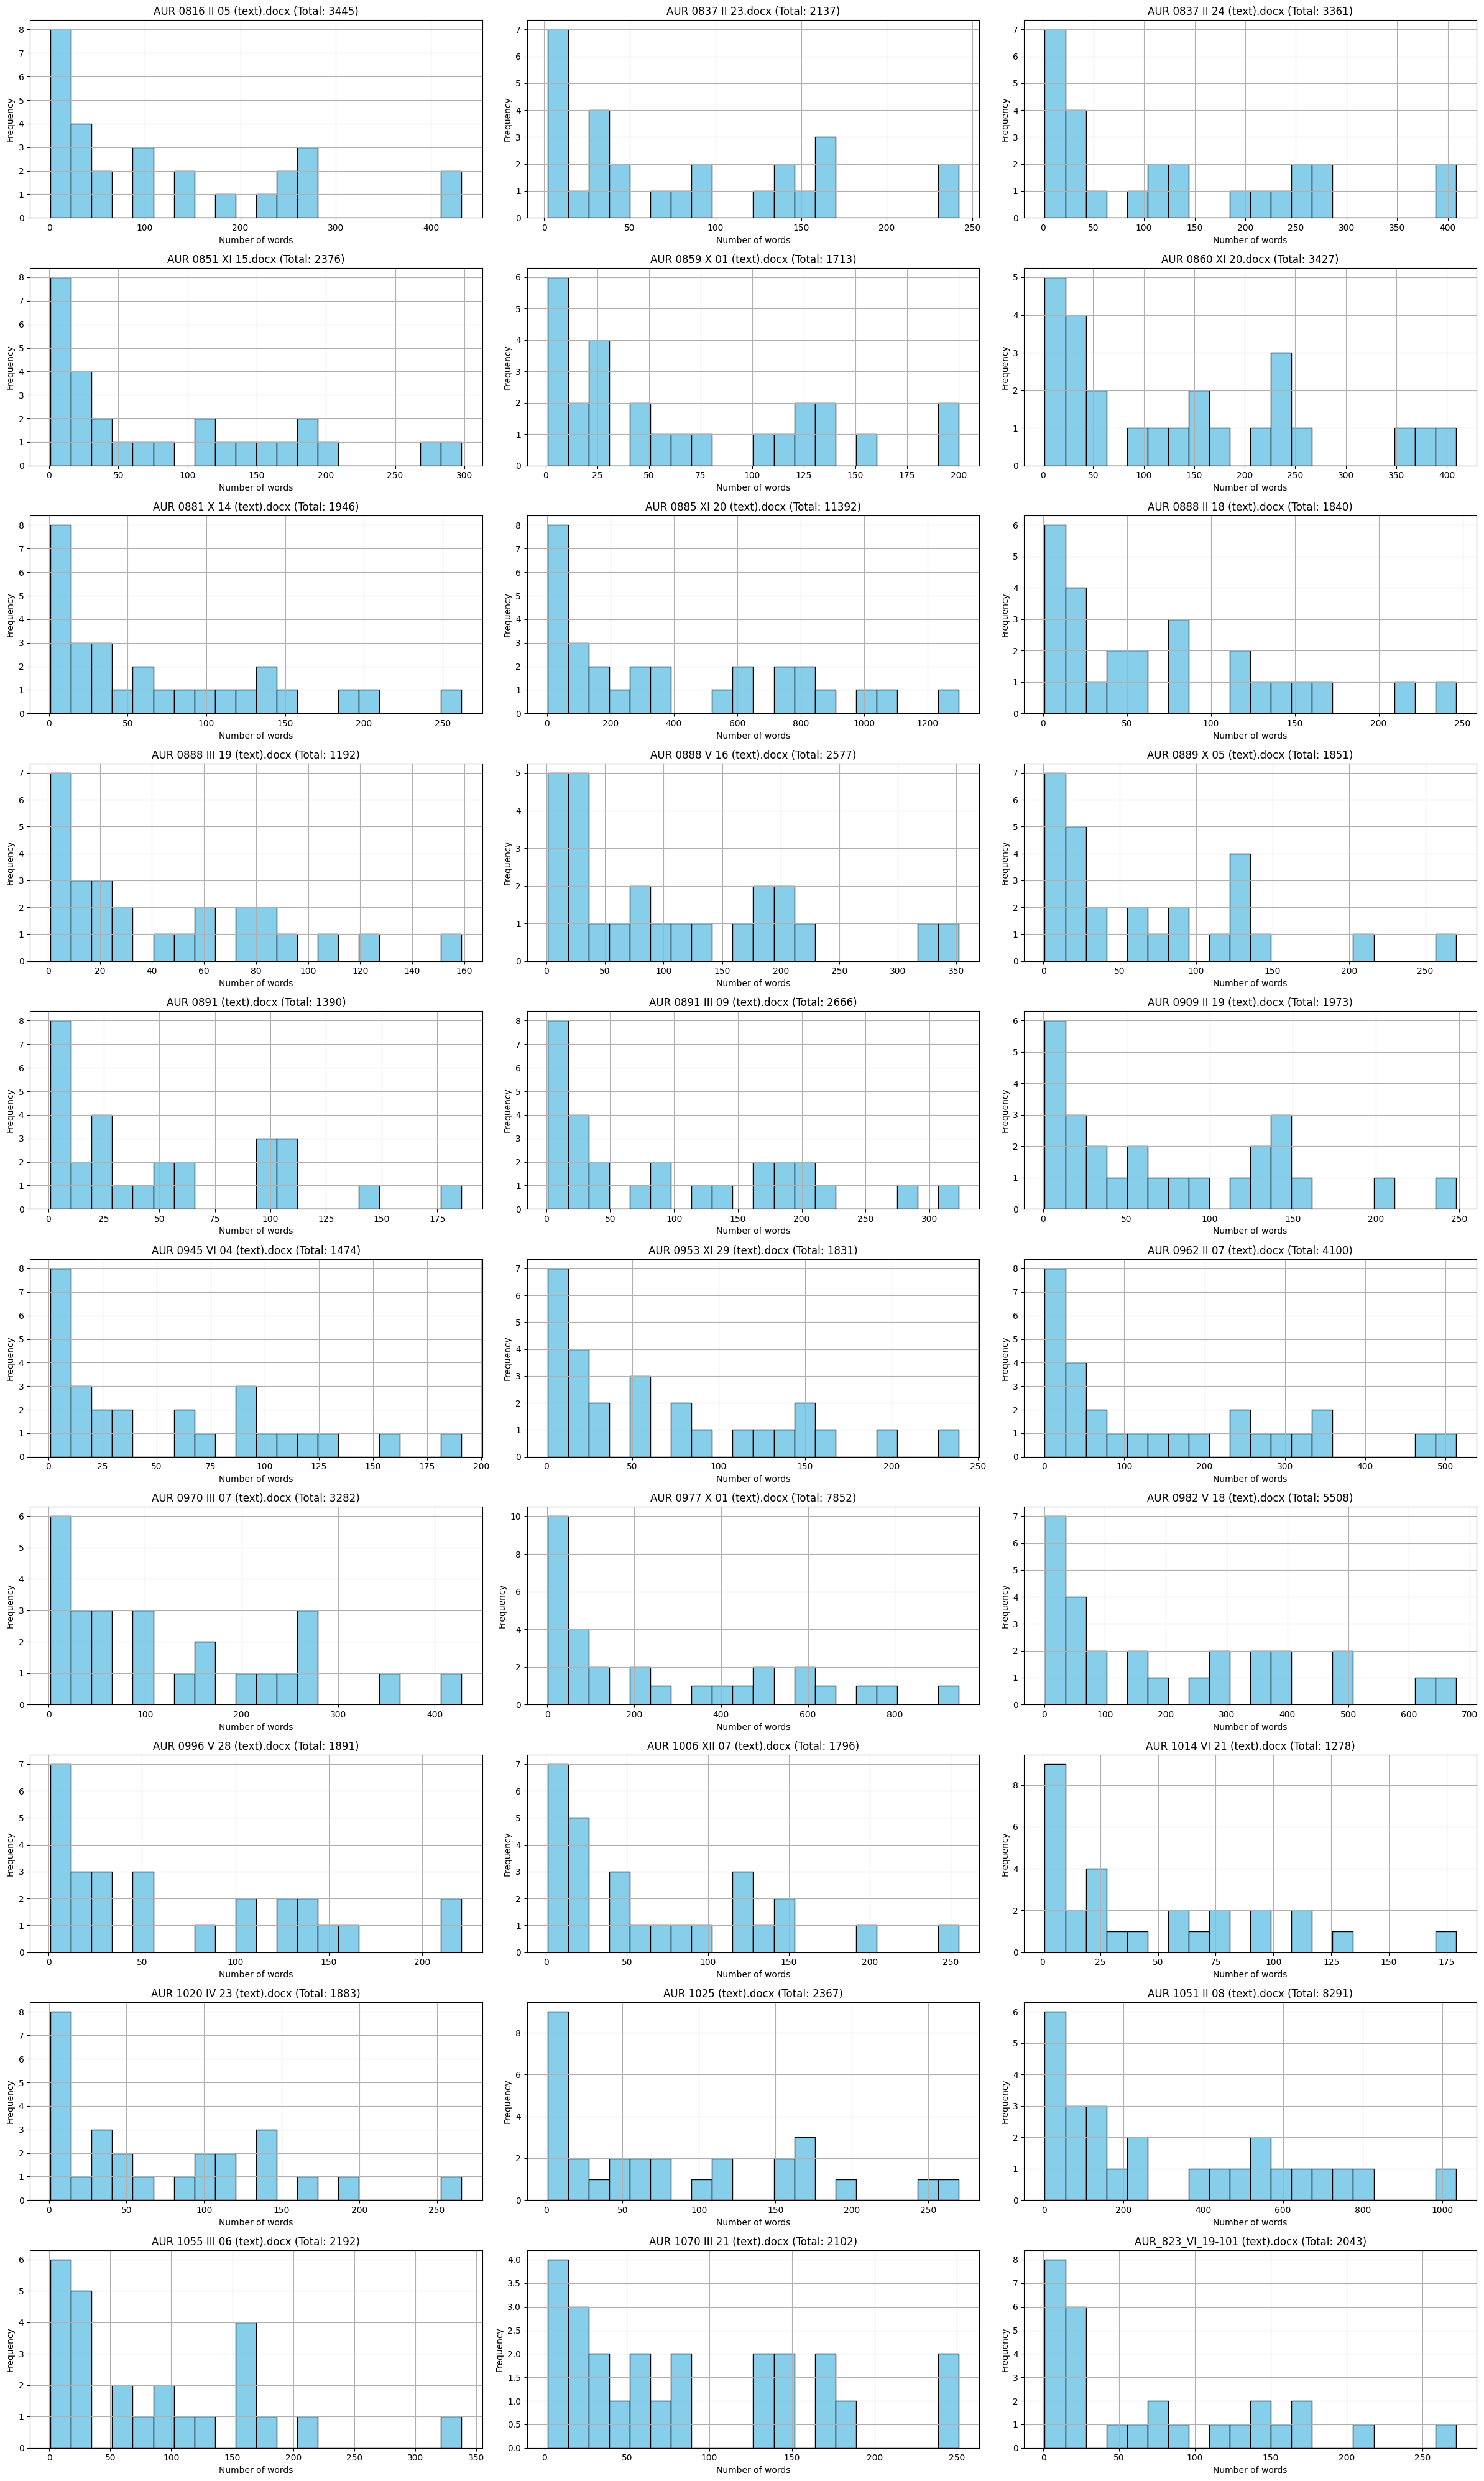

In [10]:
def plot_word_distributions(dataset):
    fig, axes = plt.subplots(10, 3, figsize=(24, 40))
    axes = axes.flatten()

    for i, (filename, text) in enumerate(dataset.items()):
        word_counts = word_distribution(text)
        total_words = sum(word_counts.values())
        word_counts_values = list(word_counts.values())
        
        axes[i].hist(word_counts_values, bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{filename} (Total: {total_words})')
        axes[i].set_xlabel('Number of words')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

directory_path = "../texts"
dataset = create_dataset_from_docs(directory_path)
plot_word_distributions(dataset)


Creating of the dataset for calculating the Hamming distance

In [11]:
def create_dataset_from_docs(directory):
    dataset = []
    for filename in os.listdir(directory):
        if filename.endswith(".docx"):
            filepath = os.path.join(directory, filename)
            doc = Document(filepath)
            text = ""
            for paragraph in doc.paragraphs:
                text += paragraph.text
            dataset.append(text)
    return dataset

def word_distribution(dataset):
    concatenated_text = ' '.join(dataset)
    preprocessed_text = preprocess_text(concatenated_text)
    words = preprocessed_text.split()
    word_counts = Counter(words)
    return word_counts

directory_path = "../texts"
dataset = create_dataset_from_docs(directory_path)

distribution = word_distribution(dataset)

Calculating the Hamming distance and ountput of random 10 similar words

In [12]:
def hamming_distance(word1, word2):
    if abs(len(word1) - len(word2)) > 2:
        return float('inf')
    elif len(word1) != len(word2):
        if len(word1) < len(word2):
            word1, word2 = word2, word1
        for i in range(len(word1)):
            if word1[:i] + word1[i+1:] == word2:
                return 1
        return float('inf')
    if len(word1) < 6 and len(word2) < 6:
        return sum(ch1 != ch2 for ch1, ch2 in zip(word1, word2))
    elif len(word1) >= 6 and len(word2) >= 6:
        return sum(ch1 != ch2 for ch1, ch2 in zip(word1, word2))
    else:
        return float('inf')
    
def find_similar_words(distribution, max_distance=2):
    words = list(distribution.keys())
    similar_words = []
    
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            word1 = words[i]
            word2 = words[j]
            
            if len(word1) < 3 or len(word2) < 3:
                continue
            
            len_ratio = max(len(word1), len(word2)) / 3.0
            max_dist = max_distance if len_ratio > max_distance else len_ratio
            
            distance = hamming_distance(word1, word2)
            if distance <= max_dist:
                similar_words.append((word1, word2, distance))
                
    return similar_words


#choosing the number of uses of the word
distribution = word_distribution(dataset)
filtered_distribution = {word: count for word, count in distribution.items() if count <= 600}

similar_words = find_similar_words(filtered_distribution, max_distance=2)

print("\nRandom selection of 10 similar word pairs with Hamming distance <= 2:")
random_selection = random.sample(similar_words, k=min(10, len(similar_words)))
for word1, word2, distance in random_selection:
    print(f"{word1} - {word2}: {distance}")

print(f"\nTotal number of similar word pairs: {len(similar_words)}")


Random selection of 10 similar word pairs with Hamming distance <= 2:
gmartyr - martyr: 1
prefata - prelati: 2
rotberti - rvdberti: 2
prenominatas - prenominatam: 1
rationis - nationis: 1
augmmento - augmento: 1
silvam - salvum: 2
qui - cui: 1
quicunque - quicumque: 1
potestatis - potestati: 1

Total number of similar word pairs: 2506


Replacing similar words with identical words

In [13]:
def replace_similar_words(dataset, similar_words):
    replacement_map = {}
    for word1, word2, _ in similar_words:
        replacement_map[word2] = word1
    
    new_dataset = []
    for text in dataset:
        words = text.split()
        new_words = [replacement_map.get(word, word) for word in words]
        new_text = ' '.join(new_words)
        new_dataset.append(new_text)
    
    return new_dataset


new_dataset = replace_similar_words(dataset, similar_words)


Distribution of the number of words used in the text after replacing similar words with identical words

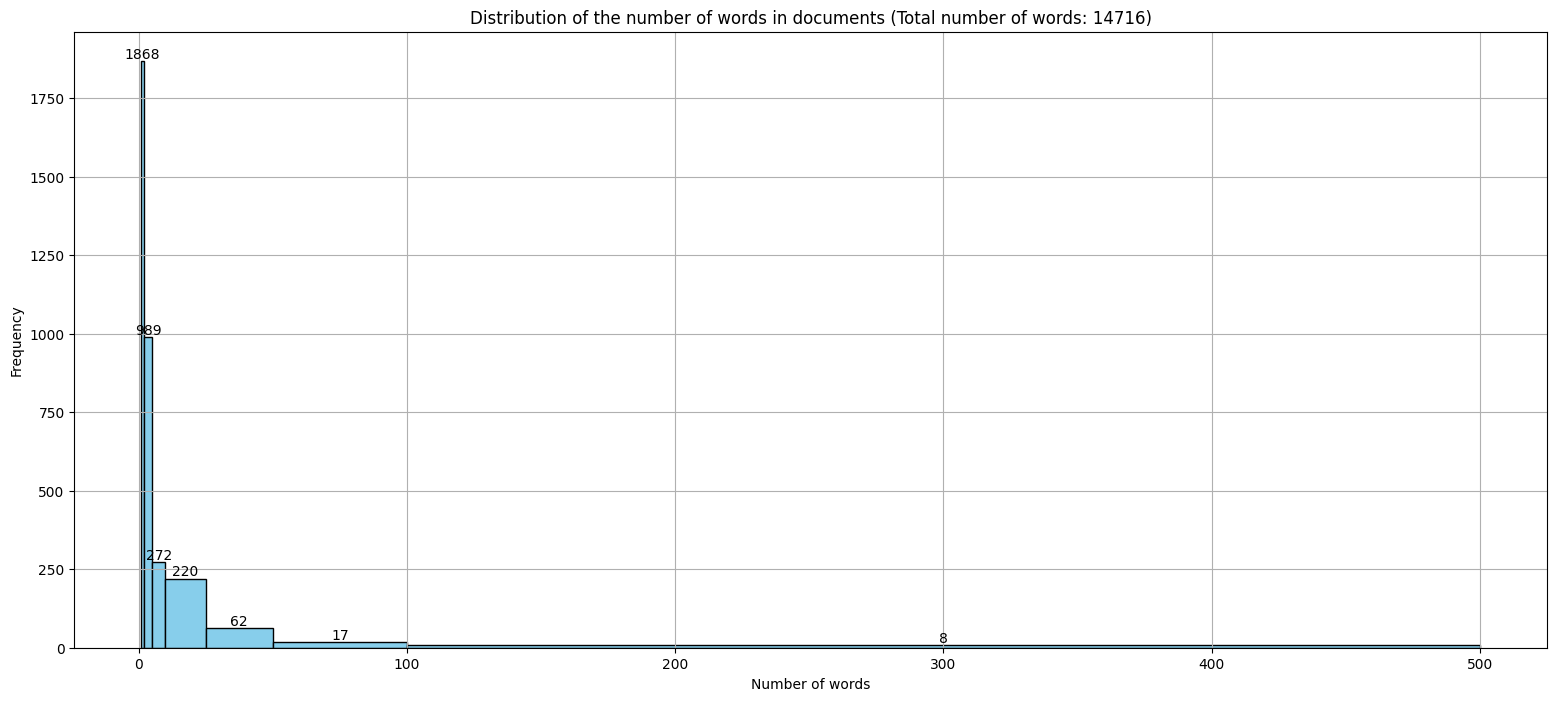

In [14]:
distribution = word_distribution(new_dataset)
total_words = sum(distribution.values())
word_counts = list(distribution.values())

custom_bins = [ 1, 2, 5, 10, 25, 50, 100, 500]

plt.figure(figsize=(19, 8))
plt.hist(word_counts, bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title(f'Distribution of the number of words in documents (Total number of words: {total_words})')
plt.grid(True)

for i in range(len(custom_bins)-1):
    bin_count = len([count for count in word_counts if custom_bins[i] <= count < custom_bins[i+1]])
    if bin_count > 0:
        plt.text((custom_bins[i] + custom_bins[i+1]) / 2, bin_count, str(bin_count), ha='center', va='bottom')

plt.show()